<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Instalasi pustaka
!pip install mglearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [50]:
# Mengambil dataset dari GitHub
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv"
df = pd.read_csv(url)
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


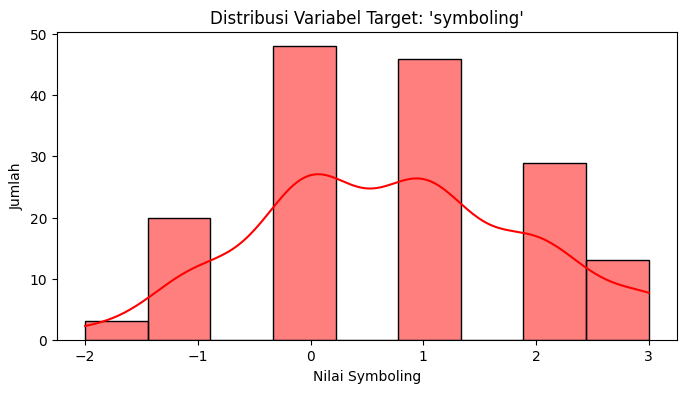

In [54]:
# Visualisasi distribusi dari variabel target 'symboling'
plt.figure(figsize=(8, 4))  # Mengatur ukuran plot
sns.histplot(df['symboling'], kde=True, color='red')  # Membuat histogram dengan KDE
plt.title("Distribusi Variabel Target: 'symboling'")  # Menambahkan judul plot
plt.xlabel("Nilai Symboling")  # Memberi label sumbu X
plt.ylabel("Jumlah")  # Memberi label sumbu Y
plt.show()

In [52]:
# 2. Praproses Data
# Hapus baris dengan missing value
df = df.dropna()

# Definisikan target dan fitur
target = 'symboling'
X = df.drop(columns=[target])
y = df[target]

# Tampilkan beberapa baris fitur awal
print("\nFitur Awal:")
print(X.head())


Fitur Awal:
      price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
3   13950.0           30        24    5500.0       102.0               10.0   
4   17450.0           22        18    5500.0       115.0                8.0   
6   17710.0           25        19    5500.0       110.0                8.5   
8   23875.0           20        17    5500.0       140.0                8.3   
10  16430.0           29        23    5800.0       101.0                8.8   

    stroke  bore fuel-system  engine-size  ...  length wheel-base  \
3      3.4  3.19        mpfi          109  ...   176.6       99.8   
4      3.4  3.19        mpfi          136  ...   176.6       99.4   
6      3.4  3.19        mpfi          136  ...   192.7      105.8   
8      3.4  3.13        mpfi          131  ...   192.7      105.8   
10     2.8  3.50        mpfi          108  ...   176.8      101.2   

    engine-location  drive-wheels  body-style  num-of-doors  aspiration  \
3             front   

In [55]:
# Mengonversi fitur kategorikal menjadi variabel numerik dengan one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)
print("\nFitur Setelah Proses One-Hot Encoding:")
print(X_encoded.head())


Fitur Setelah Proses One-Hot Encoding:
      price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
3   13950.0           30        24    5500.0       102.0               10.0   
4   17450.0           22        18    5500.0       115.0                8.0   
6   17710.0           25        19    5500.0       110.0                8.5   
8   23875.0           20        17    5500.0       140.0                8.3   
10  16430.0           29        23    5800.0       101.0                8.8   

    stroke  bore  engine-size  num-of-cylinders  ...  make_mitsubishi  \
3      3.4  3.19          109                 4  ...            False   
4      3.4  3.19          136                 5  ...            False   
6      3.4  3.19          136                 5  ...            False   
8      3.4  3.13          131                 5  ...            False   
10     2.8  3.50          108                 4  ...            False   

    make_nissan  make_peugot  make_plymouth  m

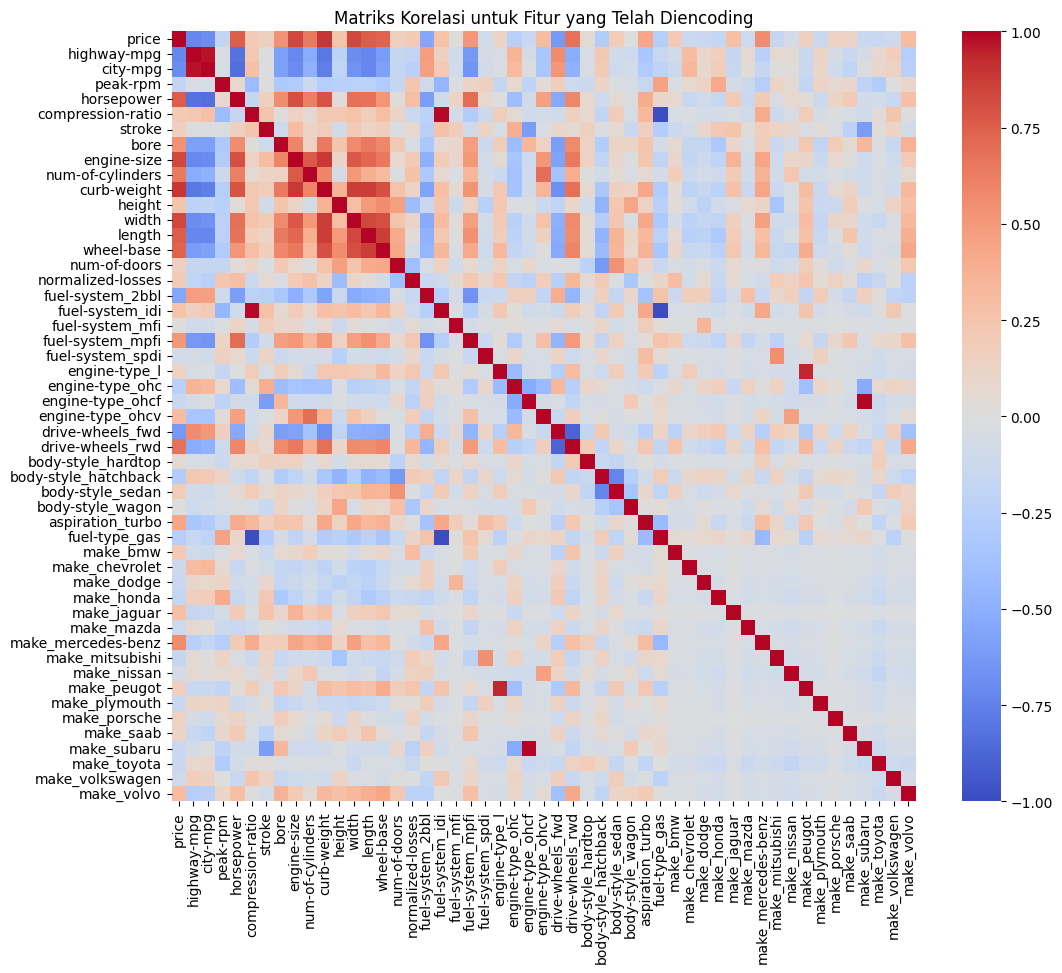

In [56]:
# Menampilkan matriks korelasi untuk fitur yang telah diencoding
plt.figure(figsize=(12, 10))  # Menyesuaikan ukuran plot
sns.heatmap(X_encoded.corr(), cmap="coolwarm", annot=False)  # Membuat heatmap korelasi
plt.title("Matriks Korelasi untuk Fitur yang Telah Diencoding")  # Menambahkan judul
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print("\nDimensi Data Latih:", X_train.shape)
print("Dimensi Data Uji:", X_test.shape)

# Inisialisasi dan pelatihan model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)


Dimensi Data Latih: (127, 51)
Dimensi Data Uji: (32, 51)


In [58]:
# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Evaluasi Model:
Mean Squared Error (MSE): 0.6676419589654023
Root Mean Squared Error (RMSE): 0.8170936047757333
R-squared (R²): 0.5451328236988875


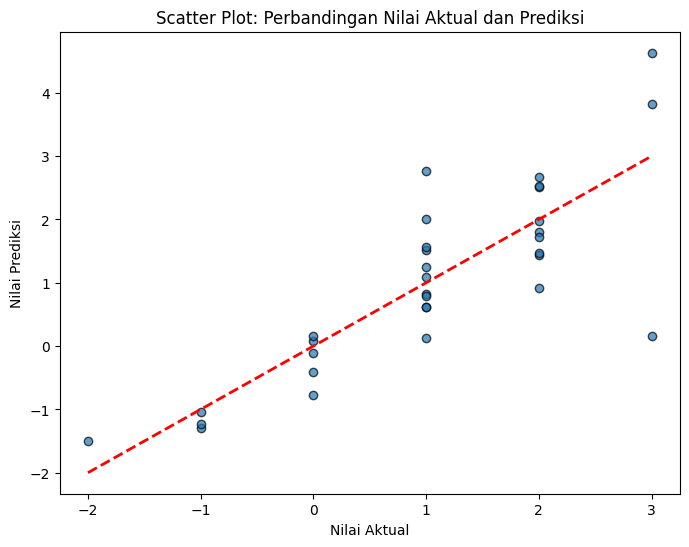

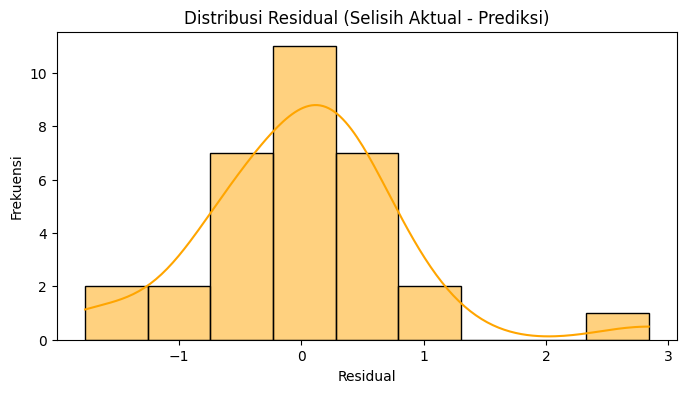

<ipython-input-59-8882197172cb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")  # Membuat bar chart


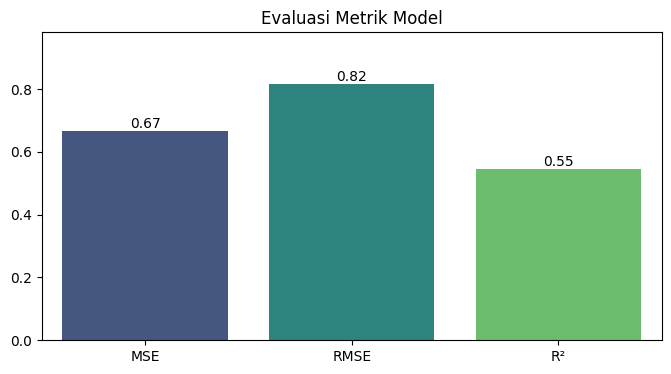

In [59]:
# a. Scatter plot antara nilai aktual dan prediksi
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0), alpha=0.7)  # Plot sebaran
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Garis referensi
plt.xlabel("Nilai Aktual")  # Label sumbu X
plt.ylabel("Nilai Prediksi")  # Label sumbu Y
plt.title("Scatter Plot: Perbandingan Nilai Aktual dan Prediksi")  # Judul plot
plt.show()

# b. Visualisasi distribusi residual
residuals = y_test - y_pred  # Menghitung residual (selisih antara aktual dan prediksi)
plt.figure(figsize=(8, 4))  # Menyesuaikan ukuran plot
sns.histplot(residuals, kde=True, color='orange')  # Histogram residual dengan KDE
plt.title("Distribusi Residual (Selisih Aktual - Prediksi)")  # Judul plot
plt.xlabel("Residual")  # Label sumbu X
plt.ylabel("Frekuensi")  # Label sumbu Y
plt.show()

# c. Bar Chart untuk evaluasi metrik model
# MSE dan RMSE menunjukkan tingkat error, sedangkan R² menilai kualitas model (mendekati 1 lebih baik)
metrics = {'MSE': mse, 'RMSE': rmse, 'R²': r2}
plt.figure(figsize=(8, 4))  # Mengatur ukuran plot
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")  # Membuat bar chart
plt.title("Evaluasi Metrik Model")  # Judul plot
plt.ylim(0, max(mse, rmse) * 1.2)  # Menyesuaikan skala grafik
for index, value in enumerate(metrics.values()):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')  # Menampilkan nilai pada bar
plt.show()


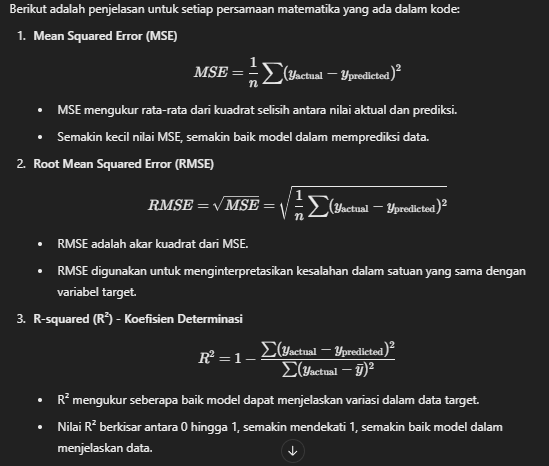

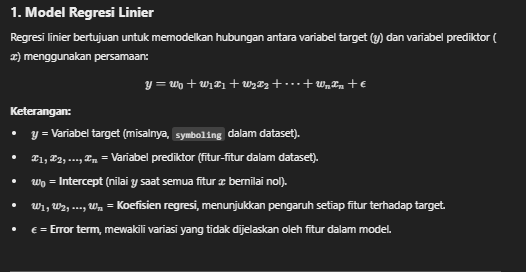

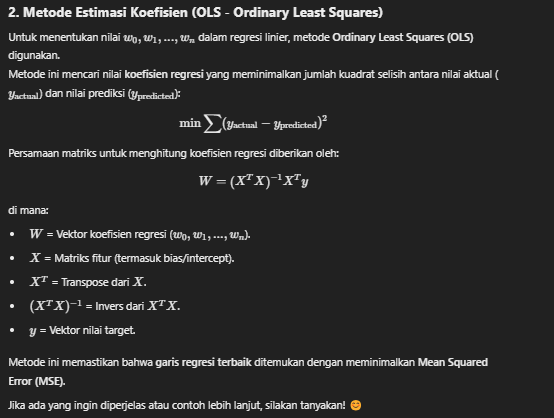